# Most common evaluation metrics used for Classification
* Accuracy
* Precision (P)
* Recall (R)
* F1 Score (F1)
* Area under the curve (AUC)
* Log loss
* Precision at k (P@k)
* Average Precision at k (AP@k)
* Mean Average precision at k(MAP@k)

# Most common evaluation metrics used for Regression
* Mean Absolute Error (MAP)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)
* Root Mean Squared Logarithimic Error (RMSLE)
* Mean Percentage Error (MPE)
* Mean Absolute Percentage Error (MAPE)
* R^2

# Classification  Metrics


When we have equal number of positive and negative samples in a binary classification problem, we can use Accuracy, Precision Recall and F1 Score

__Accuracy__: Accuracy defines how accurate is the model

In [1]:
# custom function for accuracy
def accuracy(y_true, y_pred):
    """
    Function to calculate accuracy
    :param y_true: list of true target values
    :param y_pred: list of predicted target values
    :return: accuracy_score
    """
    # initialize the counter to zero
    correct_counter = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            correct_counter += 1
    
    return correct_counter / len(y_true)


l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 1]
print("Custom accuracy function: " + str(accuracy(l1, l2)))

# accuracy using scikit-learn
from sklearn import metrics

print("Scikit-learn accuracy function: " + str(metrics.accuracy_score(l1, l2)))    
    

Custom accuracy function: 0.75
Scikit-learn accuracy function: 0.75


__Definitions__

__True Positive (TP)__ : If the true value is positive and predicted value is also positive

__True Negative (TN)__ : If the true value is negative and predicted value is also negative

__Flase Positive (FP)__ : If the true value is negative and predicted value is positive

__False Negative (FN)__ : If the true value is positive and predicted value is negative

In [2]:
def true_positive(y_true, y_pred):
    """
    Function to calculate True Positives
    :param y_true: list of true target values
    :param y_pred: list of predicted target values
    :return: number of True Positives
    """
    tp_counter = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp_counter += 1
    return tp_counter

def true_negative(y_true, y_pred):
    """
    Function to calculate True Negatives
    :param y_true: list of true target values
    :param y_pred: list of predicted target values
    :return: number of True Negatives
    """
    tn_counter = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn_counter += 1
    return tn_counter

def false_positive(y_true, y_pred):
    """
    Function to calculate False Positives
    :param y_true: list of true target values
    :param y_pred: list of predicted target values
    :return: number of True Positives
    """
    fp_counter = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp_counter += 1
    return fp_counter

def false_negative(y_true, y_pred):
    """
    Function to calculate False Negatives
    :param y_true: list of true target values
    :param y_pred: list of predicted target values
    :return: number of False Negatives
    """
    fn_counter = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn_counter += 1
    return fn_counter

l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]

print("True Positives: " + str(true_positive(l1, l2)))
print("True Negatives: " + str(true_negative(l1, l2)))
print("False Positives: " + str(false_positive(l1, l2)))
print("False Negatives: " + str(false_negative(l1, l2)))

True Positives: 2
True Negatives: 3
False Positives: 1
False Negatives: 2


__Precision (P)__: Out of the total predictions that are positive, what fraction of them are actually positive
        
        Precision = TP / (TP + FP)

In [3]:
def precision(y_true, y_pred):
    """
    Function to calculate Precision
    :param y_true: list of true target values
    :param y_pred: list of predicted target values
    :return: precision score
    """
    tp = true_positive(y_true,y_pred)
    fp = false_positive(y_true, y_pred)
    return tp / (tp + fp)

l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]

print("Precision: ", precision(l1, l2))

Precision:  0.6666666666666666


__Recall (R)__: Out of the total true positives, what fraction of them are predicted positive
        
        Recall = TP / (TP + FN)

In [4]:
def recall(y_true, y_pred):
    """
    Function to calculate recall
    :param y_true: list of true target values
    :param y_pred: list of predicted target values
    :return: recall score
    """
    tp = true_positive(y_true,y_pred)
    fn = false_negative(y_true, y_pred)
    return tp / (tp + fn)

l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]

print("Recall: ", recall(l1, l2))

Recall:  0.5


__F1 Score__: F1 Score combines the precision and recall to give a single metric. It is a harmonic mean between Precision and recall. In case of skewed targets, we can look at F1 Scores instead of accuracy

        F1 = 2PR / (P + R)

In [5]:
def f1_score(y_true, y_pred):
    """
    Function to calculate F1 Score
    :param y_true: list of true target values
    :param y_pred: list of predicted target values
    :return: F1 score
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return (2 * p * r) / (p + r)

l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]

print("Custom F1 Score function: ", f1_score(l1, l2))

from sklearn import metrics
print("Scikit-learn F1 Score function: ", metrics.f1_score(l1, l2))

Custom F1 Score function:  0.5714285714285715
Scikit-learn F1 Score function:  0.5714285714285715


__TPR (True Positive Rate)__ or Recall is also known as sensitivity
    
        TPR = TP / (TP + FN) 

In [6]:
def tpr(y_true, y_pred):
    """
    Function to calculate tpr
    :param y_true: list of true target values
    :param y_pred: list of predicted values
    :return: tpr/recall
    """
    return recall(y_true, y_pred) 

l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]

print("Total Positive Rate: ", recall(l1, l2))

Total Positive Rate:  0.5


__False Positive Rate (FPR)__ is defined as

        FPR = FP / (TN + FP)
__1 - FPR__ is known as __specificity or True Negative Rate or TNR__

In [7]:
def fpr(y_true, y_pred):
    """
    Function to calculate fpr
    :param y_true: list of true target values
    :param y_pred: list of predicted target values
    :return: fpr
    """
    fp = false_positive(y_true,y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (tn + fp)

def tnr(y_true, y_pred):
    """
    Function to calculate tnr
    :param y_true: list of true target values
    :param y_pred: list of predicted target values
    :return: tnr
    """
    return 1 - fpr(y_true, y_pred)


l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]

print("False positive rate: ", fpr(l1, l2))
print("True Negative rate: ", tnr(l1, l2))


False positive rate:  0.25
True Negative rate:  0.75


# AUC (Area under the curve)

In [8]:
from sklearn import metrics

l1 = [0, 0, 1, 1]
l2 = [0.1, 0.4, 0.35, 0.8]

print("AUC Score: ", metrics.roc_auc_score(l1, l2))

AUC Score:  0.75


# Log loss
    Log loss = -1.0 * (target * log(prediction) + (1 - target) * log(1 - prediction))

In [9]:
import numpy as np

def log_loss(y_true, y_proba):
    """
    Function to calculate log loss
    :param y_true: list of true target values
    :param y_proba: list of predicted probability values
    :result: overall log loss
    """
    # define epsilon value which will be used to clip probabilities
    epsilon = 1e-15
    
    loss = []
    for yt, yp in zip(y_true, y_proba):
        # clipping the probability
        yp = np.clip(yp, epsilon, 1 - epsilon)
        temp_loss = -1.0 *(
            yt * np.log(yp) 
            + (1 - yt) * np.log(1 - yp)
        )
        loss.append(temp_loss)
    return np.mean(loss)

y_true = [0, 0, 0, 0, 1, 0, 1,
         0, 0, 1, 0, 1, 0, 0, 1]
y_proba =[0.1, 0.3, 0.2,0.6, 0.8, 0.05,
         0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
         0.85, 0.15, 0.99]
print("Custom Log loss function: ", log_loss(y_true, y_proba))

from sklearn import metrics
print("Scikit-learn Log loss fumction",metrics.log_loss(y_true, y_proba))

Custom Log loss function:  0.49882711861432294
Scikit-learn Log loss fumction 0.49882711861432294


# Multi class classification

__Macro Averaged Precision__: Calculate precision for all the classes individually and then average them

__Micro Averaged Precision__: Calculate class wise true positive and false positive and use that to calculate the overall precision

__Weighted Precision__: Same as macro but in this case,it is weighted average depending on the number of items in each class

In [23]:
import numpy as np
from collections import Counter
from sklearn import metrics

def macro_precision(y_true, y_pred):
    """
    Function to calculate Macro Averaged Precision
    :param y_true: list of true target values
    :param y_pred: list of predicted target values
    :return: macro precision score
    """
    # getting the number of classes
    num_classes = len(np.unique(y_true))
    
    # initializing the precision to zero
    precision = 0
    
    for class_ in range(num_classes):
        #filtering based on the calss
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        
        temp_precision = tp / (tp + fp)
        precision += temp_precision
    return precision / num_classes

def micro_precision(y_true, y_pred):
    """
    Function to calculate Micro Averaged Precision
    :param y_true: list of true target values
    :param y_pred: list of predicted target values
    :return: micro precision score
    """
    # finding the number of classes
    num_classes = len(np.unique(y_true))
    
    # initializing the true positives and false positives to zero
    tp = 0
    fp = 0
    
    for class_ in range(num_classes):
        # filtering based on the class
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        tp += true_positive(temp_true, temp_pred)
        fp += false_positive(temp_true, temp_pred)
    
    precision = tp / (tp + fp)
    return precision

def weighted_precision(y_true, y_pred):
    """
    Function to calculate Weighted Averaged Precision
    :param y_true: list of true target values
    :param y_pred: list of predicted target values
    :return: weighted precision score
    """
    # finding the number of classes
    num_classes = len(np.unique(y_true))
    
    # creating the count dictionary
    class_counts = Counter(y_true)
    
    # initializing the precision to zero
    precision = 0
    
    for class_ in range(num_classes):
        # filtering based on calss
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        # calculating the temporary precision
        temp_precision = tp / (tp + fp)
        # calculating the weighted precision
        weighted_precision = class_counts[class_] * temp_precision
        # adding to the overall precision
        precision += weighted_precision
    
    return precision / len(y_true)


y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

print("Custom Macro Averaged Precision Function: ", macro_precision(y_true, y_pred))
print("Scikit-learn Macro Averaged Precision Function: ", metrics.precision_score(y_true, y_pred, average="macro"))
print("====================================================================================")
print("Custom Micro Averaged Precision Function: ", micro_precision(y_true, y_pred))
print("Scikit-learn Micro Averaged Precision Function: ", metrics.precision_score(y_true, y_pred, average="micro"))
print("====================================================================================")
print("Custom Weighted Averaged Precision Function: ", weighted_precision(y_true, y_pred))
print("Scikit-learn Weighted Averaged Precision Function: ", metrics.precision_score(y_true, y_pred, average="weighted"))


Custom Macro Averaged Precision Function:  0.3611111111111111
Scikit-learn Macro Averaged Precision Function:  0.3611111111111111
Custom Micro Averaged Precision Function:  0.4444444444444444
Scikit-learn Micro Averaged Precision Function:  0.4444444444444444
Custom Weighted Averaged Precision Function:  0.39814814814814814
Scikit-learn Weighted Averaged Precision Function:  0.39814814814814814


__Macro Averaged Recall__: Calculate recall for all the classes individually and then average them

__Micro Averaged Recall__: Calculate class wise true positive and false negatives and use that to calculate the overall precision

__Weighted Recall__: Same as macro but in this case,it is weighted average depending on the number of items in each class

In [29]:
import numpy as np
from collections import Counter
from sklearn import metrics

def macro_recall(y_true, y_pred):
    """
    Function to calculate Macro Averaged Recall
    :param y_true: list of true target values
    :param y_pred: list of predicted target values
    :return: macro recall score
    """
    # getting the number of classes
    num_classes = len(np.unique(y_true))
    
    # initializing the recall to zero
    recall = 0
    
    for class_ in range(num_classes):
        #filtering based on the calss
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        tp = true_positive(temp_true, temp_pred)
        fn = false_negative(temp_true, temp_pred)
        
        temp_recall = tp / (tp + fn)
        recall += temp_recall
    return recall / num_classes

def micro_recall(y_true, y_pred):
    """
    Function to calculate Micro Averaged Recall
    :param y_true: list of true target values
    :param y_pred: list of predicted target values
    :return: micro recall score
    """
    # finding the number of classes
    num_classes = len(np.unique(y_true))
    
    # initializing the true positives and false positives to zero
    tp = 0
    fn = 0
    
    for class_ in range(num_classes):
        # filtering based on the class
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        tp += true_positive(temp_true, temp_pred)
        fn += false_negative(temp_true, temp_pred)
    
    recall = tp / (tp + fn)
    return recall

def weighted_recall(y_true, y_pred):
    """
    Function to calculate Weighted Averaged Recall
    :param y_true: list of true target values
    :param y_pred: list of predicted target values
    :return: weighted recall score
    """
    # finding the number of classes
    num_classes = len(np.unique(y_true))
    
    # creating the count dictionary
    class_counts = Counter(y_true)
    
    # initializing the recall to zero
    recall = 0
    
    for class_ in range(num_classes):
        # filtering based on calss
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        tp = true_positive(temp_true, temp_pred)
        fn = false_negative(temp_true, temp_pred)
        # calculating the temporary precision
        temp_recall = tp / (tp + fn)
        # calculating the weighted precision
        weighted_recall = class_counts[class_] * temp_recall
        # adding to the overall precision
        recall += weighted_recall
    
    return recall / len(y_true)


y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

print("Custom Macro Averaged Recall Function: ", macro_recall(y_true, y_pred))
print("Scikit-learn Macro Averaged Recall Function: ", metrics.recall_score(y_true, y_pred, average="macro"))
print("====================================================================================")
print("Custom Micro Averaged Recall Function: ", micro_recall(y_true, y_pred))
print("Scikit-learn Micro Averaged Recall Function: ", metrics.recall_score(y_true, y_pred, average="micro"))
print("====================================================================================")
print("Custom Weighted Averaged Recall Function: ", weighted_recall(y_true, y_pred))
print("Scikit-learn Weighted Averaged Recall Function: ", metrics.recall_score(y_true, y_pred, average="weighted"))

Custom Macro Averaged Recall Function:  0.4166666666666667
Scikit-learn Macro Averaged Recall Function:  0.4166666666666667
Custom Micro Averaged Recall Function:  0.4444444444444444
Scikit-learn Micro Averaged Recall Function:  0.4444444444444444
Custom Weighted Averaged Recall Function:  0.4444444444444444
Scikit-learn Weighted Averaged Recall Function:  0.4444444444444444


__Macro Averaged F1 Score__: Calculate F1 Score for all the classes individually and then average them

__Micro Averaged F1 Score__: Calculate class wise precision and recall and use that to calculate the overall precision

__Weighted F1 Score__: Same as macro but in this case,it is weighted average depending on the number of items in each class

In [33]:
import numpy as np
from collections import Counter
from sklearn import metrics

def macro_f1(y_true, y_pred):
    """
    Function to calculate Macro Averaged F1 Score
    :param y_true: list of true target values
    :param y_pred: list of predicted target values
    :return: macro f1 score
    """
    # getting the number of classes
    num_classes = len(np.unique(y_true))
    
    # initializing the F1 Score to zero
    f1 = 0
    
    for class_ in range(num_classes):
        #filtering based on the calss
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        p = precision(temp_true, temp_pred)
        r = recall(temp_true, temp_pred)
        
        if p + r != 0:
            temp_f1 = (2 * p * r) / (p + r)
        else:
            temp_f1 = 0
            
        f1 += temp_f1
        
    return f1 / num_classes

def micro_f1(y_true, y_pred):
    """
    Function to calculate Micro Averaged F1 Score
    :param y_true: list of true target values
    :param y_pred: list of predicted target values
    :return: micro f1 score
    """
    # finding the number of classes
    num_classes = len(np.unique(y_true))
    
    # initializing the true positives, false positives and flase negatives to zero
    tp = 0
    fp = 0
    fn = 0
    
    for class_ in range(num_classes):
        # filtering based on the class
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        tp += true_positive(temp_true, temp_pred)
        fn += false_negative(temp_true, temp_pred)
        fp += false_negative(temp_true, temp_pred)
        
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    if p + r != 0:
        f1 = (2 * p * r) / (p + r)
    else:
        f1 = 0
    return f1 

def weighted_f1(y_true, y_pred):
    """
    Function to calculate Weighted Averaged F1 Score
    :param y_true: list of true target values
    :param y_pred: list of predicted target values
    :return: weighted f1 score
    """
    # finding the number of classes
    num_classes = len(np.unique(y_true))
    
    # creating the count dictionary
    class_counts = Counter(y_true)
    
    # initializing the recall to zero
    f1 = 0
    
    for class_ in range(num_classes):
        # filtering based on calss
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        p = precision(temp_true, temp_pred)
        r = recall(temp_true, temp_pred)
        if p + r != 0:
            temp_f1 = (2 * p * r) / (p + r)
        else:
            temp_f1 = 0
        weighted_f1 = class_counts[class_] * temp_f1
        f1 += weighted_f1
    
    return f1 / len(y_true)


y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

print("Custom Macro Averaged F1 Score Function: ", macro_f1(y_true, y_pred))
print("Scikit-learn Macro Averaged F1 Score Function: ", metrics.f1_score(y_true, y_pred, average="macro"))
print("====================================================================================")
print("Custom Micro Averaged F1 Score Function: ", micro_f1(y_true, y_pred))
print("Scikit-learn Micro Averaged F1 Score Function: ", metrics.f1_score(y_true, y_pred, average="micro"))
print("====================================================================================")
print("Custom Weighted Averaged F1 Score Function: ", weighted_f1(y_true, y_pred))
print("Scikit-learn Weighted Averaged F1 Score Function: ", metrics.f1_score(y_true, y_pred, average="weighted"))

Custom Macro Averaged F1 Score Function:  0.38095238095238093
Scikit-learn Macro Averaged F1 Score Function:  0.38095238095238093
Custom Micro Averaged F1 Score Function:  0.4444444444444444
Scikit-learn Micro Averaged F1 Score Function:  0.4444444444444444
Custom Weighted Averaged F1 Score Function:  0.41269841269841273
Scikit-learn Weighted Averaged F1 Score Function:  0.41269841269841273


# Confusion Matrix

Text(0.5, 48.5, 'Predicted labels')

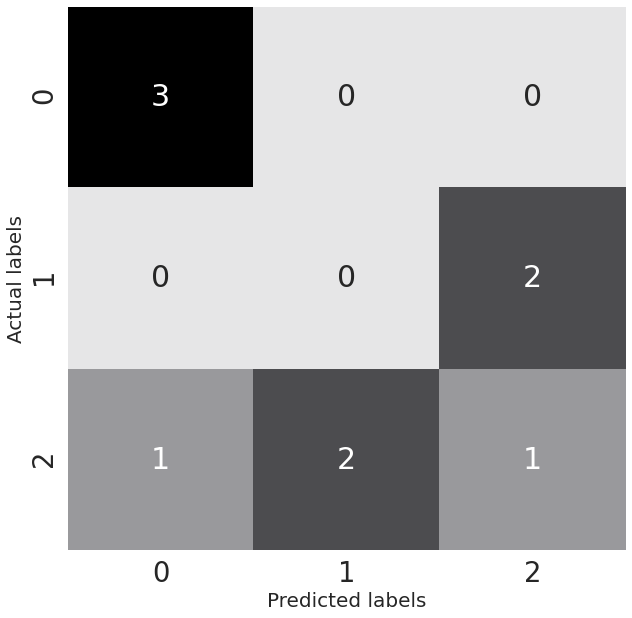

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import metrics

# some targets and predictions
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

# getting confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel("Actual labels", fontsize=20)
plt.xlabel("Predicted labels", fontsize=20)

# Advanced Metrics for Classification

## Quadratic weighted kappa

In [44]:
from sklearn import metrics

y_true = [1, 2, 3, 1, 2, 3, 1, 2, 3]
y_pred = [2, 1, 3, 1, 2, 3, 3, 1, 2]

print("Quadratic weighted kappa: ", metrics.cohen_kappa_score(y_true, y_pred, weights="quadratic"))
print("Accuracy: ", metrics.accuracy_score(y_true, y_pred))

Quadratic weighted kappa:  0.33333333333333337
Accuracy:  0.4444444444444444


## Mathew's Correlation Coefficient(MCC)
* It ranges from -1 to 1. 1 for a perfect prediction, -1 for a imperfect prediction, and 0 is random prediction



In [45]:
def mcc(y_true, y_pred):
    """
    Function to calculate Mathew's Correlation Coefficient
    :param y_true: list of true target values
    :param y_pred: list of predicted target values
    :return: mcc score
    """
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    numerator = (tp * tn) - (fp * fn)
    
    denominator = (
        (tp + fp) *
        (fn + tn) *
        (fp + tn) *
        (tp + fn)
    )
    
    denominator = denominator ** 0.5
    
    return numerator / denominator

# Multi-label Classification

## Suitable and commonly used metrics are
* Precision at k (P@k)
* Average Precision at k (AP@k)
* Mean Average Precision at k (MAP@k)
* Log loss

__Precision at k (P@k)__: If we have a original list of classes for a given sample and list of predicted classes for the same, precision is defined as the number of hits in the predicted list considering only tpo-k predictions, divided by k

__Average Precision at k (AP@k)__: AP@k is calculated using P@k. For example, if we have to calculate AP@3, we have to calculate P@1, P@2, P@3 and divide the sum by 3

__Mean Average Precision at k (MAP@k)__: It is just a average of AP@k 

In [42]:
def pk(y_true, y_pred, k):
    """
    Function to calculate Precision at k for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :param k: the value for k
    :return: precision at given value k
    """
    # we should never have this as k >= 1
    if k == 0:
        return 0
    y_pred = y_pred[:k]
    pred_set = set(y_pred)
    true_set = set(y_true)
    common_values = pred_set.intersection(true_set)
    
    return len(common_values) / len(y_pred[:k])

def apk(y_true, y_pred, k):
    """
    Function to calculate Average Precision at k for a single sample
    :param y_true: list of values, true classes
    :param y_pred: list of values, predicted classes
    :param k: the value for k
    :return: average precision at a given value k
    """
    pk_values = []
    for i in range(1, k+1):
        pk_values.append(pk(y_true, y_pred, i))
    if len(pk_values) == 0:
        return 0
    return sum(pk_values) / len(pk_values)

def mapk(y_true, y_pred, k):
    """
    Function to calculate Mean Average Precision at k
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :param k: the value for k
    :return: mean average precision at a given value k
    """
    apk_values = []
    for i in range(len(y_true)):
        apk_values.append(apk(y_true[i], y_pred[i], k))
    return sum(apk_values) / len(apk_values)

y_true = [
    [1, 2, 3],
    [0, 2],
    [1],
    [2, 3],
    [1, 0],
    []
]

y_pred = [
    [0, 1, 2],
    [1],
    [0, 2, 3],
    [2, 3, 4, 0],
    [0, 1, 2],
    [0]
]

for i in range(len(y_true)):
    for j in range(1, 4):
        print(
            f"""
            y_true={y_true[i]},
            y_pred={y_pred[i]},
            AP@{j}={apk(y_true[i], y_pred[i], k=j)}
            """
        )
print("=========================================================================")
print("Mean Average Precision at 1: ",mapk(y_true, y_pred, 1))
print("Mean Average Precision at 2: ",mapk(y_true, y_pred, 2))
print("Mean Average Precision at 3: ",mapk(y_true, y_pred, 3))
print("Mean Average Precision at 4: ",mapk(y_true, y_pred, 4))



            y_true=[1, 2, 3],
            y_pred=[0, 1, 2],
            AP@1=0.0
            

            y_true=[1, 2, 3],
            y_pred=[0, 1, 2],
            AP@2=0.25
            

            y_true=[1, 2, 3],
            y_pred=[0, 1, 2],
            AP@3=0.38888888888888884
            

            y_true=[0, 2],
            y_pred=[1],
            AP@1=0.0
            

            y_true=[0, 2],
            y_pred=[1],
            AP@2=0.0
            

            y_true=[0, 2],
            y_pred=[1],
            AP@3=0.0
            

            y_true=[1],
            y_pred=[0, 2, 3],
            AP@1=0.0
            

            y_true=[1],
            y_pred=[0, 2, 3],
            AP@2=0.0
            

            y_true=[1],
            y_pred=[0, 2, 3],
            AP@3=0.0
            

            y_true=[2, 3],
            y_pred=[2, 3, 4, 0],
            AP@1=1.0
            

            y_true=[2, 3],
            y_pred=[2, 3, 4, 0],
            AP@2=

# Regression Metrics

__Absolute Error__:
        
        Absolute Error = abs(True Value - Predicted Value)

In [43]:
import numpy as np 

def mean_absolute_error(y_true, y_pred):
    """
    Function to calculate Mean Absolute Error
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean absolute error
    """
    # initializing the error to zero
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += np.abs(yt - yp)
    return error / len(y_true)

def mean_squared_error(y_true, y_pred):
    """
    Function to calculate Mean Squared Error
    :param y_true: list of real numbers, true values
    :param y_pred: list of real values, predicted values
    :return: mean squared error
    """
    # initializing the error to zero
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += (yt - yp) ** 2
    return error / len(y_true)

def root_mean_squared_error(y_true, y_pred):
    """
    Function to calculate Root Mean Squared Error
    :param y_true: list of real numbers, true values
    :param y_pred: list of real values, predicted values
    :return: root mean squared error
    """
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_squared_log_error(y_true, y_pred):
    """
    Function to calculate Mean Squared Logarithmic Error
    :param y_true: list of real numbers, true values
    :param y_pred: list of real values, predicted values
    :return: mean squared logarithmic error
    """
    # initializing the error to zero
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += (np.log(1 + yt) - np.log(1 + yp)) ** 2
    return error / len(y_true)

def root_mean_squared_log_error(y_true, y_pred):
    """
    Function to calculate Root Mean Squared Logarithmic Error
    :param y_true: list of real numbers, true values
    :param y_pred: list of real values, predicted values
    :return: root mean squared logarithmic error
    """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

def mean_percentage_error(y_true, y_pred):
    """
    Function to calculate Mean Percentage Error
    :param y_true: list of real numbers, true values
    :param y_pred: list of real values, predicted values
    :return: mean percentage error
    """
    # initializing the error to zero
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += (yt - yp) / yt
    return error / len(y_true)

def mean_abs_percentage_error(y_true, y_pred):
    """
    Function to calculate Mean Absolute Percentage Error
    :param y_true: list of real numbers, true values
    :param y_pred: list of real values, predicted values
    :return: mean absolute percentage error
    """
    # initializing the error to zero
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += np.abs(yt - yp) / yt
    return error / len(y_true)


def r2(y_true, y_pred):
    """
    Function to calculate R-squared Score
    :param y_true: list of real numbers, true values
    :param y_pred: list of real values, predicted values
    :return: r-squared score
    """
    # calculate the mean value of the true values
    mean_true_value = np.mean(y_true)
    
    # initializing the numerator and denominator to zero
    numerator = 0
    denominator = 0
    
    for yt, yp in zip(y_true, y_pred):
        numerator += (yt - yp) ** 2
        denominator += (yt - mean_true_value) ** 2
    
    ratio = numerator / denominator
    return 1 - ratio

